In [111]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [112]:
from torchvision.models import *
from visualisation.core.utils import device
from torch import nn

model = alexnet(pretrained=True).to(device)
# print(model)

In [113]:
feature_extractor = nn.Sequential(*list(model.classifier.children())[:-1])
# print(feature_extractor)

In [114]:
model.classifier = feature_extractor
# print(model)
model.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU(inplace)
    (3): Dropout(p

In [115]:
# %matplotlib notebook 

In [116]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import torch 
from utils import *
from PIL import Image

plt.rcParams["figure.figsize"]= 16,8

In [130]:
import glob
import matplotlib.pyplot as plt
import numpy as np

from visualisation.core.utils import device 
from PIL import Image

# image_paths = glob.glob('./imagenet/*.*')
image_paths = glob.glob('/home/dexter/saliency/ImageNet_samples/*.*') # Change to your dataset path
# print(image_paths)

# images = list(map(lambda x: Image.open(x), image_paths))
# print(images)

images = list()
for image_path in image_paths:
    img = Image.open(image_path)
    images.append(img)
    img.load()

print(images)

# subplot(images, title='inputs', nrows=1, ncols=10)

[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x345 at 0x7FEA9C224F98>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375 at 0x7FEA9C224B70>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x479 at 0x7FEA9C04CE10>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x361 at 0x7FEA9C04CA58>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x384 at 0x7FEA9C04CB00>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x334 at 0x7FEA9C04CE48>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=378x594 at 0x7FEA9C04C8D0>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375 at 0x7FEA9C04C898>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375 at 0x7FEA9C04C0F0>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=264x400 at 0x7FEA9C04CDA0>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x500 at 0x7FEA9C04C5F8>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375 at 0x7FEA9C04CC88>, <PI

In [131]:
from torchvision.transforms import ToTensor, Resize, Compose, ToPILImage
from visualisation.core import *
from visualisation.core.utils import image_net_preprocessing

inputs  = [Compose([Resize((224,224)), ToTensor(), image_net_preprocessing])(x).unsqueeze(0) for x in images]  # add 1 dim for batch
# print(inputs)
inputs = [i.to(device) for i in inputs]

In [132]:
def free(modules):
    for m in modules:
        del m
    torch.cuda.empty_cache()

In [133]:
imagenet2human = {}

with open('imaganet2human.txt') as f:
    for line in f.readlines():
        key, value = line.split(':')
        key = key.replace('{', '').replace('}', '') # I forget how regex works :) 
        value = value.replace("'", '').replace(",", '')
        imagenet2human[int(key.strip())] = str(value.strip())
        
list(imagenet2human.items())[:2]

[(0, 'tench Tinca tinca'), (1, 'goldfish Carassius auratus')]

In [134]:
feature_vectors = list()
for input in inputs:
    feature_vector = model(input)
    feature_vectors.append(feature_vector)

feature_vectors_dict = dict(zip(image_paths, feature_vectors))
print(feature_vectors_dict)
print(len(feature_vectors_dict))

{'/home/dexter/saliency/ImageNet_samples/ILSVRC2012_val_00000816.JPEG': tensor([[0.0000, 0.0000, 3.2738,  ..., 0.0000, 0.0000, 2.2086]],
       device='cuda:0', grad_fn=<ReluBackward1>), '/home/dexter/saliency/ImageNet_samples/ILSVRC2012_val_00000445.JPEG': tensor([[0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0',
       grad_fn=<ReluBackward1>), '/home/dexter/saliency/ImageNet_samples/ILSVRC2012_val_00000570.JPEG': tensor([[0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0',
       grad_fn=<ReluBackward1>), '/home/dexter/saliency/ImageNet_samples/ILSVRC2012_val_00000387.JPEG': tensor([[0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0',
       grad_fn=<ReluBackward1>), '/home/dexter/saliency/ImageNet_samples/ILSVRC2012_val_00001490.JPEG': tensor([[0.0000, 0.0000, 2.6957,  ..., 0.0000, 0.0000, 0.0000]],
       device='cuda:0', grad_fn=<ReluBackward1>), '/home/dexter/saliency/ImageNet_samples/ILSVRC2012_val_00001085.JPEG': tensor([[0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0',
       grad_

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x476 at 0x7FEA9686D438>


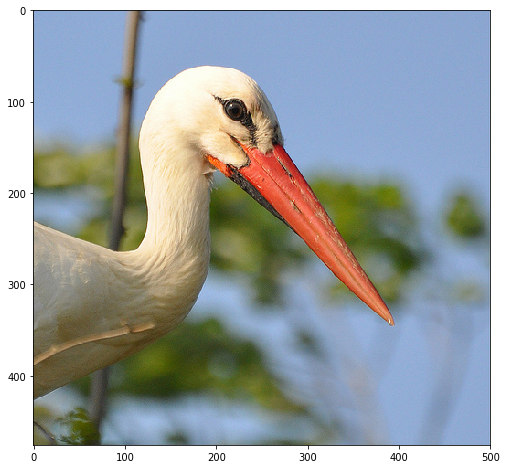

In [145]:
# Change to your test image path
test_image_path = '/home/dexter/Downloads/A-journey-into-Convolutional-Neural-Network-visualization-/test/test2.JPEG'
test_image = Image.open(test_image_path)
print(test_image)
fig = plt.figure()
plt.imshow(test_image)

In [146]:
processed_test_image  = Compose([Resize((224,224)), ToTensor(), image_net_preprocessing])(test_image).unsqueeze(0)  # add 1 dim for batch
print(processed_test_image)
print(processed_test_image.shape)

tensor([[[[ 0.2796,  0.3138,  0.2624,  ...,  0.2111,  0.2796,  0.3138],
          [ 0.3309,  0.2796,  0.2624,  ...,  0.2624,  0.2796,  0.3138],
          [ 0.2967,  0.2967,  0.2796,  ...,  0.2624,  0.2624,  0.3138],
          ...,
          [-0.2513, -0.2513, -0.3027,  ...,  0.3309,  0.3138,  0.3823],
          [-0.3027, -0.2684, -0.2856,  ...,  0.2796,  0.2967,  0.3652],
          [-0.3027, -0.2856, -0.2684,  ...,  0.2967,  0.3309,  0.3481]],

         [[ 0.9580,  0.9580,  0.9755,  ...,  0.8704,  0.8704,  0.9055],
          [ 0.9230,  0.9580,  0.9580,  ...,  0.8704,  0.8529,  0.9055],
          [ 0.9580,  0.9580,  0.9580,  ...,  0.8529,  0.8529,  0.9230],
          ...,
          [-0.2150, -0.1625, -0.1975,  ...,  0.9055,  0.9230,  0.9930],
          [-0.2325, -0.1625, -0.1800,  ...,  0.9230,  0.9055,  0.9755],
          [-0.2500, -0.2325, -0.2150,  ...,  0.9405,  0.9230,  0.9755]],

         [[ 1.8557,  1.8905,  1.8731,  ...,  1.7860,  1.8034,  1.8383],
          [ 1.9080,  1.9080,  

In [147]:
# Forward-propagate to get the embedding
embedding = model(processed_test_image.to(device))
print(embedding.shape)
print(embedding)

torch.Size([1, 4096])
tensor([[0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0',
       grad_fn=<ReluBackward1>)


In [148]:
import torch


def pdist(sample_1, sample_2, norm=2, eps=1e-5):
    r"""Compute the matrix of all squared pairwise distances.
    Arguments
    ---------
    sample_1 : torch.Tensor or Variable
        The first sample, should be of shape ``(n_1, d)``.
    sample_2 : torch.Tensor or Variable
        The second sample, should be of shape ``(n_2, d)``.
    norm : float
        The l_p norm to be used.
    Returns
    -------
    torch.Tensor or Variable
        Matrix of shape (n_1, n_2). The [i, j]-th entry is equal to
        ``|| sample_1[i, :] - sample_2[j, :] ||_p``."""
    n_1, n_2 = sample_1.size(0), sample_2.size(0)
    norm = float(norm)
    if norm == 2.:
        norms_1 = torch.sum(sample_1**2, dim=1, keepdim=True)
        norms_2 = torch.sum(sample_2**2, dim=1, keepdim=True)
        norms = (norms_1.expand(n_1, n_2) +
                 norms_2.transpose(0, 1).expand(n_1, n_2))
        distances_squared = norms - 2 * sample_1.mm(sample_2.t())
        return torch.sqrt(eps + torch.abs(distances_squared))
    else:
        dim = sample_1.size(1)
        expanded_1 = sample_1.unsqueeze(1).expand(n_1, n_2, dim)
        expanded_2 = sample_2.unsqueeze(0).expand(n_1, n_2, dim)
        differences = torch.abs(expanded_1 - expanded_2) ** norm
        inner = torch.sum(differences, dim=2, keepdim=False)
        return (eps + inner) ** (1. / norm)

{'/home/dexter/saliency/ImageNet_samples/ILSVRC2012_val_00000816.JPEG': tensor([[121.0143]], device='cuda:0', grad_fn=<SqrtBackward>), '/home/dexter/saliency/ImageNet_samples/ILSVRC2012_val_00000445.JPEG': tensor([[101.9305]], device='cuda:0', grad_fn=<SqrtBackward>), '/home/dexter/saliency/ImageNet_samples/ILSVRC2012_val_00000570.JPEG': tensor([[106.0178]], device='cuda:0', grad_fn=<SqrtBackward>), '/home/dexter/saliency/ImageNet_samples/ILSVRC2012_val_00000387.JPEG': tensor([[117.0561]], device='cuda:0', grad_fn=<SqrtBackward>), '/home/dexter/saliency/ImageNet_samples/ILSVRC2012_val_00001490.JPEG': tensor([[121.3626]], device='cuda:0', grad_fn=<SqrtBackward>), '/home/dexter/saliency/ImageNet_samples/ILSVRC2012_val_00001085.JPEG': tensor([[110.3968]], device='cuda:0', grad_fn=<SqrtBackward>), '/home/dexter/saliency/ImageNet_samples/ILSVRC2012_val_00000149.JPEG': tensor([[115.8471]], device='cuda:0', grad_fn=<SqrtBackward>), '/home/dexter/saliency/ImageNet_samples/ILSVRC2012_val_000011

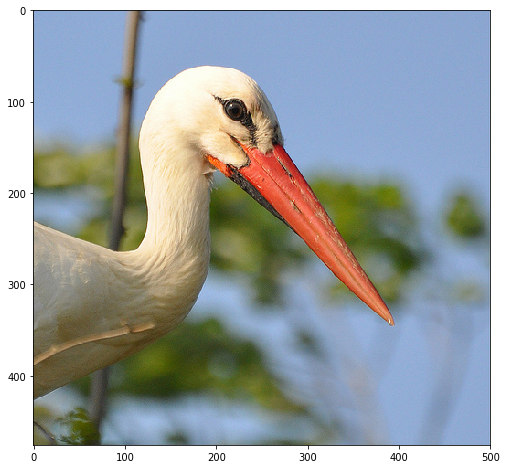

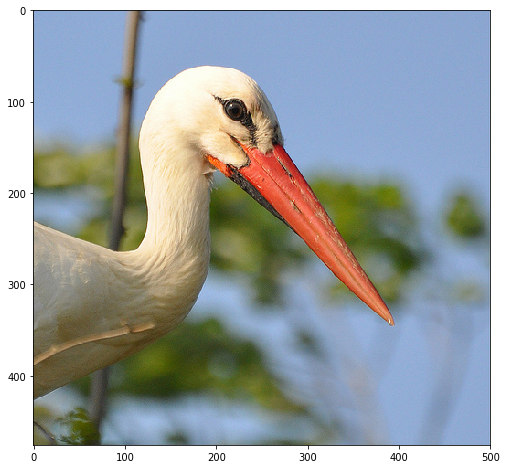

In [149]:
new_dict = {}
for key, feature_vector in feature_vectors_dict.items():
    new_dict[key] = pdist(embedding, feature_vector)

print(new_dict)
test_image = Image.open(test_image_path)
print(test_image)
fig = plt.figure()
plt.imshow(test_image)
path = min(new_dict, key=new_dict.get)
similar_image = Image.open(path)
fig = plt.figure()
plt.imshow(similar_image)